# Projekt 2, kamień milowy 1
### Sebastian Deręgowski, Bartosz Jamroży, Dawid Janus

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

W naszym zadaniu mamy do czynienia z rozdziałami ksiąg religijnych. Zmiennymi objaśniającymi są słowa pojawiające się w tych rozdziałach, a wartością każdej z tych zmiennych dla danej obserwacji (rozdziału księgi) jest liczba wystąpień danego słowa w tym rozdziale. Naszym zadaniem jest pogrupowanie rozdziałów w księgi, które się z nich składają.

Mamy dwie ramki danych, różniące się między sobą jedynie tym, że w jednej z nich mamy dodatkową kolumnę określającą księgę i numer rozdziału.

In [3]:
df = pd.read_csv("AllBooks_baseline_DTM_Unlabelled.csv")
df

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
labelled_df = pd.read_csv("AllBooks_baseline_DTM_Labelled.csv")
labelled_df

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,BookOfWisdom_Ch15,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,BookOfWisdom_Ch16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,BookOfWisdom_Ch17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,BookOfWisdom_Ch18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Zanim przejdziemy do właściwej eksploracji, przyjrzyjmy się do czego dążymy, tzn. ile ksiąg jest w naszym zbiorze, a co za tym idzie - ile klasterów powinniśmy otrzymać:

In [115]:
all_chapters = labelled_df["Unnamed: 0"].values
books = {}
for i,j in enumerate(all_chapters):
    if j.split(sep="_")[0] in books.keys():
        books[j.split(sep="_")[0]]+=1
    else:
        books[j.split(sep="_")[0]]=1
books

{'Buddhism': 46,
 'TaoTeChing': 81,
 'Upanishad': 162,
 'YogaSutra': 189,
 'BookOfProverb': 31,
 'BookOfEcclesiastes': 12,
 'BookOfEccleasiasticus': 50,
 'BookOfWisdom': 19}

Jak widzimy, księgi mają dość zróżnicowaną liczbę rozdziałów:

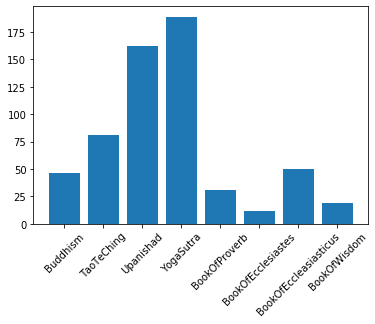

In [97]:
plt.bar(books.keys(),books.values())
plt.xticks(rotation=45)
plt.show()

Zajmijmy się teraz słowami w naszym zbiorze. Sprawdźmy, które z nich pojawiają się najczęściej:

In [116]:
x=list(df.sum().array)
x1=list(df.columns.values)
words_counter=dict(zip(x1,x))
sorted(words_counter.items(), key=operator.itemgetter(1), reverse=True)

[('shall', 1168.0),
 ('man', 846.0),
 ('thy', 645.0),
 ('one', 473.0),
 ('things', 468.0),
 ('thou', 449.0),
 ('god', 385.0),
 ('life', 357.0),
 ('hath', 334.0),
 ('spiritual', 309.0),
 ('lord', 300.0),
 ('mind', 298.0),
 ('thee', 297.0),
 ('heart', 272.0),
 ('soul', 261.0),
 ('wisdom', 251.0),
 ('men', 229.0),
 ('upon', 228.0),
 ('good', 227.0),
 ('way', 208.0),
 ('great', 204.0),
 ('knowledge', 204.0),
 ('wise', 203.0),
 ('power', 196.0),
 ('may', 194.0),
 ('right', 193.0),
 ('death', 183.0),
 ('made', 183.0),
 ('know', 182.0),
 ('consciousness', 182.0),
 ('body', 177.0),
 ('time', 177.0),
 ('like', 177.0),
 ('away', 174.0),
 ('wicked', 170.0),
 ('self', 170.0),
 ('therefore', 165.0),
 ('without', 165.0),
 ('also', 164.0),
 ('s', 159.0),
 ('fear', 157.0),
 ('world', 156.0),
 ('evil', 145.0),
 ('words', 145.0),
 ('come', 143.0),
 ('give', 143.0),
 ('let', 137.0),
 ('earth', 130.0),
 ('people', 129.0),
 ('many', 128.0),
 ('every', 128.0),
 ('said', 127.0),
 ('thus', 120.0),
 ('called',

Zliczmy teraz, ile jest słów, które pojawiają się daną ilość razy:

In [13]:
all_words = {}
for x in range(1169):
    all_words[x]=[]
    for i,j in dict2.items():
        if j==x:
            all_words[x].append(i)

In [117]:
all_words_len = {}
for i,j in all_words.items():
    all_words_len[i] = len(j)
all_words_len_pd = pd.DataFrame.from_dict(all_words_len,orient='index').reset_index()

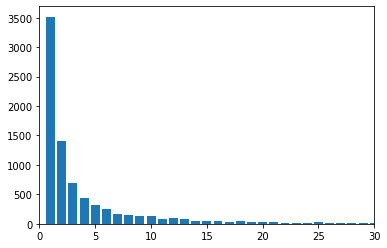

In [118]:
plt.bar(all_words_len_pd.iloc[:,0],all_words_len_pd.iloc[:,1])
plt.xlim(0,30)
plt.show()

Jak widać, najwięcej jest słów, które pojawiają się tylko raz. Takie słowa są "bezużyteczne" z punktu widzenia klasteryzacji, podczas inżynierii cech rozważymy usunięcie tych zmiennych. Liczba słów, które pojawiają się taką samą ilość razy maleje wraz z ilością powtórzeń tych słów, co jest dość naturalne.

Stwórzmy teraz słownik, który jako klucze będzie przyjmował kolejne rozdziały ksiąg, a jako wartości słownik słów znajdujących się w tym rozdziale wraz z liczbą ich wystąpień.

In [199]:
dict2={}



for i in range(590):
    dict1={}
    for j in df.columns.values:
        if df.at[i,j]!=0:
            dict1[j]=df.at[i,j]
    dict2[i]=dict1.copy()
        
print(dict2[0])

{'open': 1.0, 'mentally': 2.0, 'i': 1.0, 'affliction': 9.0, 'joyful': 2.0, 'skillful': 5.0, 'past': 1.0, 'think': 1.0, 'train': 2.0, 'contemplatives': 3.0, 'qualities': 2.0, 'day': 2.0, 'unfit': 1.0, 'fit': 1.0, 'said': 1.0, 'horrified': 2.0, 'happy': 6.0, 'delighted': 1.0, 'similarly': 3.0, 'training': 2.0, 'sir': 1.0, 'verbal': 9.0, 'done': 1.0, 'knowledgeable': 1.0, 'lead': 4.0, 'unskillful': 5.0, 'act': 16.0, 'feeling': 1.0, 'exercise': 2.0, 'want': 2.0, 'reveal': 1.0, 'led': 2.0, 'ven': 1.0, 'gratified': 1.0, 'give': 1.0, 'bodily': 19.0, 'present': 1.0, 'disgusted': 1.0, 'mirror': 1.0, 'may': 1.0, 'acts': 23.0, 'others': 6.0, 'cause': 1.0, 'absolutely': 1.0, 'feel': 1.0, 'reflectionthe': 1.0, 'rahula': 7.0, 'companion': 1.0, 'purify': 4.0, 'brahmans': 3.0, 'teacher': 1.0, 'selfaffliction': 6.0, 'know': 8.0, 'purified': 1.0, 'lay': 1.0, 'confess': 1.0, 'buddha': 4.0, 'this': 2.0, 'course': 2.0, 'stay': 2.0, 'refreshed': 2.0, 'reflect': 4.0, 'continue': 1.0, 'life': 1.0, 'blessed': 

Dla każdego rozdziału najpopularniejsze słowo i ilość jego wystąpień:

In [187]:
dict3={}
for i,j in dict2.items():
    dict3[i]=dict(sorted(j.items(), key=operator.itemgetter(1), reverse=True))

dict4={}
for i in range(590):
    if i==13:
        continue
    dict4[i]=list(dict3[i].keys())[0],dict3[i][list(dict3[i].keys())[0]]
    
dict4

{0: ('acts', 23.0),
 1: ('stress', 8.0),
 2: ('stress', 29.0),
 3: ('noble', 14.0),
 4: ('stressfulness', 5.0),
 5: ('called', 10.0),
 6: ('called', 12.0),
 7: ('aggregate', 8.0),
 8: ('called', 10.0),
 9: ('one', 4.0),
 10: ('property', 38.0),
 11: ('feeling', 11.0),
 12: ('fabrications', 3.0),
 14: ('fabrications', 3.0),
 15: ('consciousness', 8.0),
 16: ('craving', 5.0),
 17: ('cessation', 24.0),
 18: ('sees', 4.0),
 19: ('knowledge', 2.0),
 20: ('called', 12.0),
 21: ('prerequisite', 9.0),
 22: ('consciousness', 6.0),
 23: ('nutriment', 6.0),
 24: ('end', 3.0),
 25: ('neither', 6.0),
 26: ('unbecome', 3.0),
 27: ('wavering', 3.0),
 28: ('right', 8.0),
 29: ('right', 25.0),
 30: ('wish', 24.0),
 31: ('wrong', 15.0),
 32: ('admirable', 8.0),
 33: ('view', 24.0),
 34: ('taking', 4.0),
 35: ('know', 5.0),
 36: ('discerns', 47.0),
 37: ('trains', 14.0),
 38: ('focused', 6.0),
 39: ('qualities', 3.0),
 40: ('concentration', 14.0),
 41: ('body', 18.0),
 42: ('jhana', 3.0),
 43: ('away', 3

`if i==13: continue` nie jest przypadkowe - ta obserwacja, jak się okazało, nie zawiera żadnego wyrazu!

Mając to, pogrupujmy rozdziały według ich najpopularniejszych słów:

In [211]:
dict5={}
for i,j in dict4.items():
#     print(i,j)
    if j[0] in dict5.keys():
        dict5[j[0]].append(i)
    else:
        dict5[j[0]]=[i]
    
dict5

{'acts': [0],
 'stress': [1, 2],
 'noble': [3],
 'stressfulness': [4],
 'called': [5, 6, 8, 20, 59],
 'aggregate': [7],
 'one': [9, 47, 130, 175, 256, 267, 410],
 'property': [10],
 'feeling': [11],
 'fabrications': [12, 14],
 'consciousness': [15, 22, 415, 424, 448],
 'craving': [16],
 'cessation': [17],
 'sees': [18],
 'knowledge': [19, 127, 416],
 'prerequisite': [21],
 'nutriment': [23],
 'end': [24],
 'neither': [25, 185],
 'unbecome': [26],
 'wavering': [27],
 'right': [28, 29, 307, 386],
 'wish': [30],
 'wrong': [31],
 'admirable': [32],
 'view': [33],
 'taking': [34, 45],
 'know': [35, 115, 116, 157, 265, 327, 335],
 'discerns': [36],
 'trains': [37],
 'focused': [38],
 'qualities': [39],
 'concentration': [40],
 'body': [41, 143, 193, 223, 229, 243, 430, 432, 433, 447],
 'jhana': [42],
 'away': [43],
 'fermentations': [44],
 'name': [46, 77, 186],
 'keep': [48, 54],
 'things': [49,
  66,
  79,
  108,
  181,
  213,
  334,
  354,
  358,
  363,
  443,
  562,
  577,
  585,
  589],

Na koniec stwórzmy macierz, zliczającą liczbę wspólnych wyrazów dla każdych dwóch rozdziałów:

In [209]:
matrix = np.zeros((590,590))
for i in range(590):
    l = len(list(dict2[i].keys()))
    for j in range(590):
        for k in range(l):
            if list(dict2[i].keys())[k] in dict2[j].keys():
                matrix[i][j]=matrix[i][j]+1

Spróbujmy to zwizualizować:

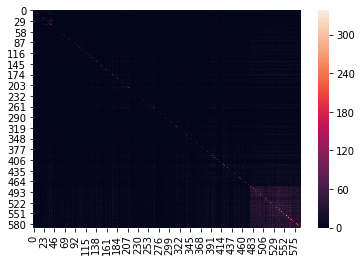

In [218]:
sns.heatmap(matrix)
plt.show()

Widzimy tylko "ślad" na głównej przekątnej. Usuńmy go zerując ją, a także przyporządkujmy zero-jedynkowo liczbę wspólnych wyrazów, jako granicę, przyjmując 10.

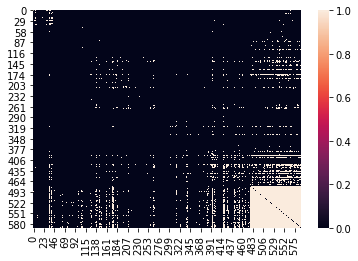

In [217]:
import copy
matrix_copy=copy.deepcopy(matrix)
for i in range(590):
    matrix_copy[i][i]=0
for i in range(590):
    for j in range(590):
        if matrix_copy[i][j]>10:
            matrix_copy[i][j]=1
        else:
            matrix_copy[i][j]=0
sns.heatmap(matrix_copy)
plt.show()

Widzimy dużą korelację pomiędzy rozdziałami z ostatnich wierszy.